# Introduction
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.The country is multilingual with 11 official languages, each of which is guaranteed equal status. 


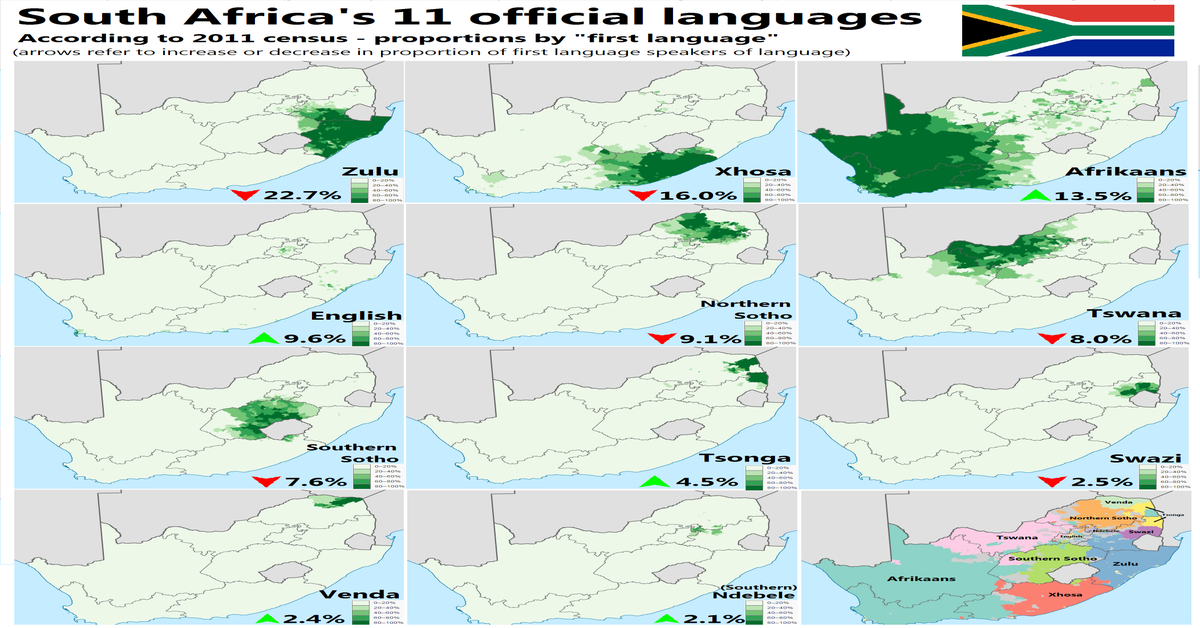

# Problem statement
Build a robust Machine Learning Model that will be able to predict a language used in a text.

# Import libraries and datasets

In [36]:
import pandas as pd
import numpy as np
from numpy import percentile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import re 
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chauk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chauk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [4]:
train.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [5]:
train.shape

(33000, 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
train.describe()

lang_id                                               text
count    33000                                              33000
unique      11                                              29948
top        ven  ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq      3000                                                 17

# Exploratory data analysis

In [8]:
train['lang_id'].value_counts() # total number of each obsservation under the train data

ven    3000
afr    3000
eng    3000
xho    3000
nbl    3000
nso    3000
tsn    3000
ssw    3000
sot    3000
tso    3000
zul    3000
Name: lang_id, dtype: int64

C:\Users\chauk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang_id', ylabel='count'>

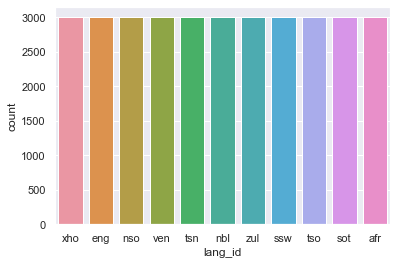

In [9]:
## Plot the Sentiment value count 
sns.countplot(train["lang_id"])

All lang_Id have the same appears. This shows us  that the data is balanced.

<AxesSubplot:xlabel='text', ylabel='Density'>

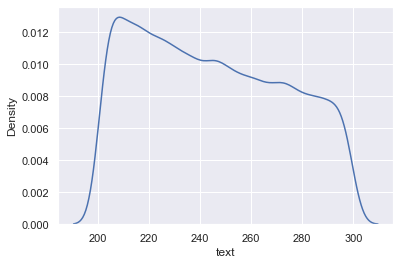

In [10]:
## Lenght of the Text using KDEplot
lenght = train["text"].str.len()
sns.kdeplot(lenght)

This graph shows us that the lenghth of each text is the same

In [11]:
## Checking for stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'weren', "shan't", 'not', "you'd", 'again', 'him', 'didn', "wouldn't", 'wouldn', 'off', 'so', "hadn't", "doesn't", 'its', 'hasn', 'don', 'there', 'and', 'shouldn', 'being', 'below', 'other', 'me', 'whom', 'than', 'has', 'any', 'am', 'are', 's', "mightn't", 'his', "you'll", 'myself', 'd', 'as', 'were', 'that', 'of', 'up', "it's", 'in', 'through', 'too', 'own', "haven't", 'between', 'herself', 'y', 'was', 'above', 'mightn', 'haven', 'it', 'why', 'those', 'during', 'nor', 'very', 'while', 'both', 'her', 'ma', 'now', 'which', 'doesn', 'after', 'hers', 'should', 'because', 'll', "that'll", 'where', 'if', 'until', 'by', 'is', 'most', 'with', 'once', 'mustn', 'theirs', 'did', 'had', 'some', 'yours', "don't", 'into', 'couldn', 'yourselves', "aren't", 'about', "needn't", 've', 'or', 'have', "couldn't", 'what', 'needn', 'ourselves', 'won', 'yourself', 'these', "weren't", 'before', 'them', 'my', "mustn't", 'on', 'no', 'will', 'o', 'more', "shouldn't", 'this', 'doing', 'few', 'ours', 'then', 'her

In [12]:
word_list = list()
for i in range(len(train)):
    lip = train.text[i].split()
    for k in lip:
        word_list.append(k)

In [13]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('ya', 28237),
 ('a', 21233),
 ('le', 21050),
 ('ka', 17960),
 ('go', 17099),
 ('e', 15620),
 ('na', 11172),
 ('u', 10151),
 ('die', 10055),
 ('wa', 10021),
 ('the', 10008),
 ('ba', 8839),
 ('o', 8768),
 ('ho', 8397),
 ('ku', 8155),
 ('of', 7593),
 ('nga', 6855),
 ('in', 5508),
 ('di', 5430),
 ('ke', 5423)]

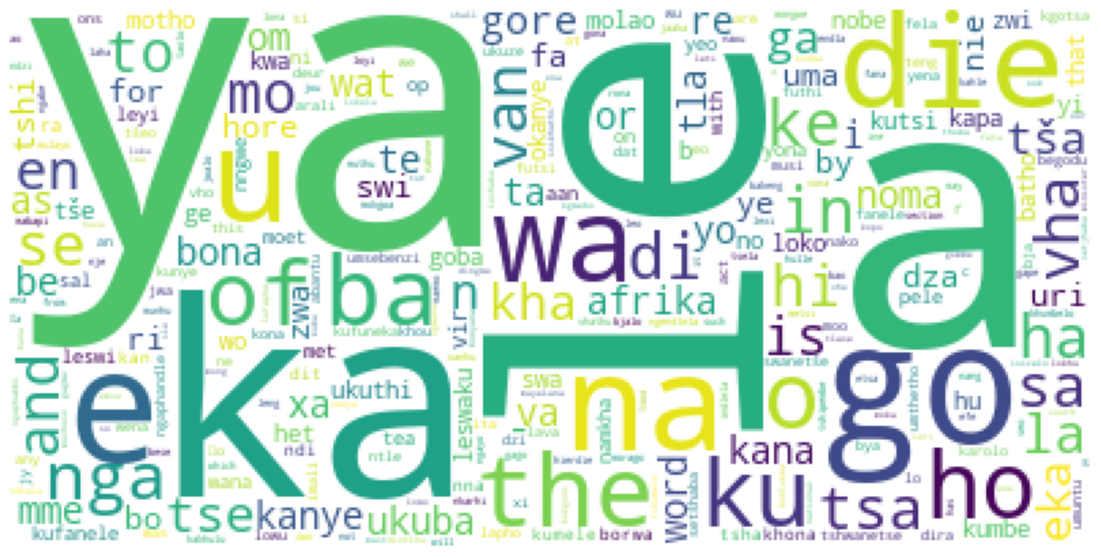

In [14]:
from wordcloud import WordCloud
wordList2 = " ".join(word_list)
stop_word_Cloud = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_word_Cloud,max_words=2000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
plt.figure(figsize=[20,10])
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

# Cleaning Data

In [15]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [16]:
## Clean the text 
text_reviews = list()
t = list()

for i in range(len(train)):
    text = re.sub('[^a-zA-Z]'," ",train['text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)
    
for i in range(len(test)):
    text = re.sub('[^a-zA-Z]'," ",test['text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    t.append(text)

In [17]:


# Make lower case
print ('Lowering case...')
train['text'] = train['text'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['text'] = train['text'].apply(remove_punctuation_numbers)

Lowering case...
Cleaning punctuation...


# Train Test Split
Split the train_data into training and testing data. This is to make sure that there isn't any leakage of information when we actually fit the test_data that we imported. To avoid overfitting, we are using the train_data to train and test our models.

In [18]:
#Splitting you Data for X and Y
X_NB = train['text']
y = train['lang_id']

In [19]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_NB)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model evaluation

# Logistic regression classification
Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

C:\Users\chauk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.9995075757575758
Testing accuracy Score :  0.9957575757575757
              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       578
         eng       1.00      1.00      1.00       617
         nbl       0.99      0.98      0.99       590
         nso       1.00      1.00      1.00       622
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       599
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      0.99       612
         zul       0.98      0.99      0.99       585

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Naive Bayes classification
Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

In [22]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.9996590909090909
Testing accuracy Score :  0.9986363636363637
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       584
         eng       1.00      1.00      1.00       617
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       624
         sot       1.00      1.00      1.00       619
         ssw       1.00      1.00      1.00       583
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       607
         zul       1.00      0.99      1.00       591

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Random forest classification
Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

In [24]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
2          Naive Bayes       0.998636
0  Logistic Regression       0.995758
1        Random Forest       0.988788

In [25]:
X_NB_test = test['text']
X_test =vector.transform(X_NB_test)

# saving model

In [26]:
test_pred = naiveByes_clf.predict(X_test)

test['lang_id'] = test_pred

submission = test[['index','lang_id']]
submission.to_csv('submission.csv', index=False) # writing data to a CSV file


In [27]:
submission

index lang_id
0         1     tsn
1         2     nbl
2         3     ven
3         4     ssw
4         5     afr
...     ...     ...
5677   5678     eng
5678   5679     nso
5679   5680     sot
5680   5681     sot
5681   5682     nbl

[5682 rows x 2 columns]

# Conclusion

Best model is Naive Bayes because of its accurancy and higher score of F1.